# Using Rigol Class to control oscilloscope

In [29]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import rigol
# initialize and set backend to usbtmc
r = rigol.Rigol("usbtmc")

1: Rigol Technologies          - DS1000 SERIES                   
Enter the number of the device you want to connect to: 1
Asking *IDN? returns: Rigol Technologies,DS1102E,DS1EB142004074,00.03.01.00.00


### Query the waveform intensity

##### Let's take a look at some of the methods in the Rigol class

In [2]:
help(r)

Help on instance of Rigol in module rigol:

class Rigol
 |  Methods defined here:
 |  
 |  __init__(self, backend, idProduct=None, idVendor=None)
 |  
 |  askBrightness(self)
 |      query the brightness of the grid
 |      returns a string from 0 to 32
 |  
 |  askChannelScale(self, channel)
 |      query what the scale is for channel <channel>
 |  
 |  askIntensity(self)
 |      Returns waveform brightness from 0 to 32
 |  
 |  askTriggerMode(self)
 |      queries trigger mode
 |  
 |  askTriggerSource(self, mode)
 |      query what trigger source is being used.
 |      mode - can be any of ["EDGE", "PULS", "VIDEO", "SLOP", "PATT", "DUR", "ALT"]
 |  
 |  askWaveformData(self, source)
 |      returns 1024 data for <source>.  Raw Data.
 |      run through numpy.frombuffer(data, "B") to get point data
 |  
 |  auto(self)
 |  
 |  brightness(self, level)
 |      Changes the brightness level of the grid.
 |      level - Brightness level from 0 to 32
 |  
 |  channelDisplay(self, channel, 

Do note that I'm writing all of these methods so that the oscilloscope can be controlled without looking at the programmers manual at all, but you can always write in your own commands (in case I have not implemented them) by using the Rigol.dev.write() or Rigol.dev.ask() methods.

### Basic Methods

In [3]:
r.stop()

In [4]:
r.auto()

In [5]:
r.run()

### Display Methods

In [6]:
r.askIntensity()

u'32'

Set intensity to 32.

In [7]:
r.intensity(32)

### Trigger Methods

Set trigger source for CHAN1 to EDGE

In [8]:
r.triggerSource("EDGE", "CHAN1")

Query trigger source for edge

In [9]:
r.askTriggerSource("EDGE")

u'CH1'

### Channel Methods

Turn on channel 2 and then turn it off

In [10]:
r.channelDisplay(2)

In [11]:
r.channelDisplay(2, on=False)

Turn on channel 1

In [12]:
r.channelDisplay(1)

Set channel scale

In [13]:
r.channelScale(1, 2)

In [14]:
r.askChannelScale(1)

u'2.000e+00'

### Measure Methods

Measure peak to peak voltage

In [15]:
r.measureVpp(1)

u'1.02e+01'

### Waveform Methods

plot something

In [30]:
% matplotlib inline

In [42]:
r.run()

In [33]:
r.waveformPointsMode("RAW")

In [60]:
rawdata = r.askWaveformData("CHAN1")

In [61]:
y = np.frombuffer(rawdata, "B")

In [66]:
scale = r.askChannelScale(1)
scale = float(scale)
scale

2.0

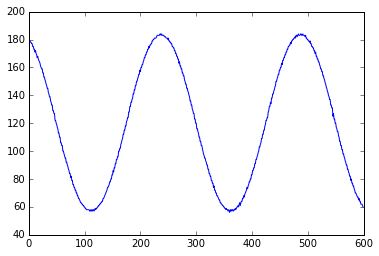

In [65]:
plt.plot([x for x in range(len(y))], y)